In [1]:
import pandas as pd

In [3]:
from nba_api.stats.static import teams

In [4]:
nba_teams = teams.get_teams()

In [5]:
nba_teams[:5]

[{'id': 1610612737,
  'full_name': 'Atlanta Hawks',
  'abbreviation': 'ATL',
  'nickname': 'Hawks',
  'city': 'Atlanta',
  'state': 'Atlanta',
  'year_founded': 1949},
 {'id': 1610612738,
  'full_name': 'Boston Celtics',
  'abbreviation': 'BOS',
  'nickname': 'Celtics',
  'city': 'Boston',
  'state': 'Massachusetts',
  'year_founded': 1946},
 {'id': 1610612739,
  'full_name': 'Cleveland Cavaliers',
  'abbreviation': 'CLE',
  'nickname': 'Cavaliers',
  'city': 'Cleveland',
  'state': 'Ohio',
  'year_founded': 1970},
 {'id': 1610612740,
  'full_name': 'New Orleans Pelicans',
  'abbreviation': 'NOP',
  'nickname': 'Pelicans',
  'city': 'New Orleans',
  'state': 'Louisiana',
  'year_founded': 2002},
 {'id': 1610612741,
  'full_name': 'Chicago Bulls',
  'abbreviation': 'CHI',
  'nickname': 'Bulls',
  'city': 'Chicago',
  'state': 'Illinois',
  'year_founded': 1966}]

In [6]:
def one_dict(list_dict):
    keys = list_dict[0].keys()
    out_dict = {key:[] for key in keys}
    for dictop in list_dict:
        for key, value in dictop.items():
            out_dict[key].append(value)
    return out_dict

In [7]:
dict_nba_team = one_dict(nba_teams)

In [8]:
df_teams = pd.DataFrame(dict_nba_team)
df_teams

,id,full_name,abbreviation,nickname,city,state,year_founded
0,1610612737,Atlanta Hawks,ATL,Hawks,Atlanta,Atlanta,1949
1,1610612738,Boston Celtics,BOS,Celtics,Boston,Massachusetts,1946
2,1610612739,Cleveland Cavaliers,CLE,Cavaliers,Cleveland,Ohio,1970
3,1610612740,New Orleans Pelicans,NOP,Pelicans,New Orleans,Louisiana,2002
4,1610612741,Chicago Bulls,CHI,Bulls,Chicago,Illinois,1966
5,1610612742,Dallas Mavericks,DAL,Mavericks,Dallas,Texas,1980
6,1610612743,Denver Nuggets,DEN,Nuggets,Denver,Colorado,1976
7,1610612744,Golden State Warriors,GSW,Warriors,Golden State,California,1946
8,1610612745,Houston Rockets,HOU,Rockets,Houston,Texas,1967
9,1610612746,Los Angeles Clippers,LAC,Clippers,Los Angeles,California,1970


In [9]:
df_warriors = df_teams[df_teams['nickname']=='Warriors']
df_warriors

,id,full_name,abbreviation,nickname,city,state,year_founded
7,1610612744,Golden State Warriors,GSW,Warriors,Golden State,California,1946


## Here is the unique id. we will use for further operation-- 1610612744

In [10]:
id_warriors = df_warriors[['id']].values[0][0]

In [11]:
id_warriors

1610612744

## Now we will use the leaguegamefinder module from the API to get specific game record by the id we got previously

In [13]:
from nba_api.stats.endpoints import leaguegamefinder

In [14]:
gamefinder = leaguegamefinder.LeagueGameFinder(team_id_nullable=id_warriors) #-- like database query

In [15]:
games = gamefinder.get_data_frames()[0]
games.head()

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS
0,22019,1610612744,GSW,Golden State Warriors,0021900967,2020-03-10,GSW vs. LAC,L,239,107,...,0.815,4.0,31.0,35.0,25,3,0,9,17,-24.0
1,22019,1610612744,GSW,Golden State Warriors,0021900944,2020-03-07,GSW vs. PHI,W,240,118,...,0.750,7.0,28.0,35.0,30,4,2,7,19,4.0
2,22019,1610612744,GSW,Golden State Warriors,0021900929,2020-03-05,GSW vs. TOR,L,240,113,...,0.760,14.0,38.0,52.0,34,4,5,15,23,-8.0
3,22019,1610612744,GSW,Golden State Warriors,0021900913,2020-03-03,GSW @ DEN,W,239,116,...,0.636,5.0,30.0,35.0,31,8,3,11,23,16.0
4,22019,1610612744,GSW,Golden State Warriors,0021900901,2020-03-01,GSW vs. WAS,L,239,110,...,0.708,18.0,34.0,52.0,25,7,7,21,24,-14.0


## now we will compare like their performance on home or away venue. or their score comparison later

In [16]:
games_home = games[games['MATCHUP']=='GSW vs. TOR']
games_away = games[games['MATCHUP']=='GSW @ TOR']

In [18]:
games_home.head(10)

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS
2,22019,1610612744,GSW,Golden State Warriors,0021900929,2020-03-05,GSW vs. TOR,L,240,113,...,0.760,14.0,38.0,52.0,34,4,5,15,23,-8.0
73,22019,1610612744,GSW,Golden State Warriors,1521900020,2019-07-07,GSW vs. TOR,W,201,80,...,0.923,6.0,37.0,43.0,18,8,3,20,25,10.0
78,42018,1610612744,GSW,Golden State Warriors,0041800406,2019-06-13,GSW vs. TOR,L,240,110,...,0.700,11.0,31.0,42.0,28,9,6,16,23,-4.0
80,42018,1610612744,GSW,Golden State Warriors,0041800404,2019-06-07,GSW vs. TOR,L,241,92,...,0.667,8.0,34.0,42.0,26,6,6,17,23,-13.0
81,42018,1610612744,GSW,Golden State Warriors,0041800403,2019-06-05,GSW vs. TOR,L,241,109,...,0.833,13.0,28.0,41.0,25,8,3,14,21,-14.0
153,22018,1610612744,GSW,Golden State Warriors,0021800415,2018-12-12,GSW vs. TOR,L,239,93,...,0.692,5.0,35.0,40.0,28,5,11,19,18,-20.0
293,22017,1610612744,GSW,Golden State Warriors,0021700063,2017-10-25,GSW vs. TOR,W,241,117,...,0.864,6.0,31.0,37.0,32,10,7,17,15,5.0
374,22016,1610612744,GSW,Golden State Warriors,0021600485,2016-12-28,GSW vs. TOR,W,240,121,...,0.833,9.0,42.0,51.0,33,4,9,20,16,10.0
514,22015,1610612744,GSW,Golden State Warriors,0021500164,2015-11-17,GSW vs. TOR,W,239,115,...,0.667,9.0,25.0,34.0,31,10,6,20,29,5.0
532,12015,1610612744,GSW,Golden State Warriors,0011500009,2015-10-05,GSW vs. TOR,W,240,95,...,0.750,4.0,33.0,37.0,29,8,7,17,22,8.0


In [19]:
games_away.head(10)

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS
79,42018,1610612744,GSW,Golden State Warriors,0041800405,2019-06-10,GSW @ TOR,W,240,106,...,0.714,6.0,31.0,37.0,27,5,7,15,22,1.0
82,42018,1610612744,GSW,Golden State Warriors,0041800402,2019-06-02,GSW @ TOR,W,240,109,...,0.870,6.0,36.0,42.0,34,7,5,15,26,5.0
83,42018,1610612744,GSW,Golden State Warriors,0041800401,2019-05-30,GSW @ TOR,L,239,109,...,0.935,9.0,29.0,38.0,29,6,2,16,27,-9.0
159,22018,1610612744,GSW,Golden State Warriors,0021800316,2018-11-29,GSW @ TOR,L,265,128,...,0.850,17.0,29.0,46.0,27,6,5,14,22,-3.0
254,22017,1610612744,GSW,Golden State Warriors,0021700631,2018-01-13,GSW @ TOR,W,239,127,...,0.857,3.0,27.0,30.0,28,4,3,6,20,2.0
396,22016,1610612744,GSW,Golden State Warriors,0021600165,2016-11-16,GSW @ TOR,W,240,127,...,0.929,7.0,28.0,35.0,33,9,7,12,25,6.0
413,12016,1610612744,GSW,Golden State Warriors,0011600001,2016-10-01,GSW @ TOR,L,241,93,...,0.625,9.0,33.0,42.0,19,15,7,21,24,-4.0
415,22016,1610612744,GSW,Golden State Warriors,1521600051,2016-07-14,GSW @ TOR,L,198,69,...,0.750,14.0,29.0,43.0,16,9,3,17,25,-6.0
505,22015,1610612744,GSW,Golden State Warriors,0021500290,2015-12-05,GSW @ TOR,W,239,112,...,0.722,8.0,35.0,43.0,22,2,5,12,24,3.0
586,22014,1610612744,GSW,Golden State Warriors,0021400861,2015-02-27,GSW @ TOR,W,240,113,...,0.842,9.0,38.0,47.0,31,11,5,12,22,24.0


## lets make a graph plot to compare away vs home 

In [21]:
import matplotlib.pyplot as plt

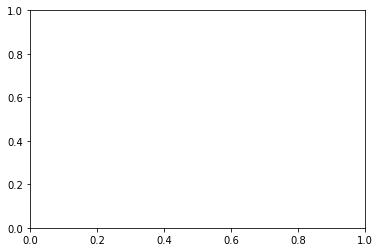

In [22]:
fig, ax = plt.subplots()

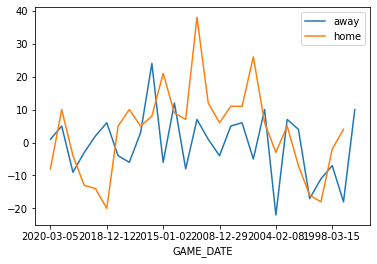

In [23]:
fig, ax = plt.subplots()
games_away.plot(x='GAME_DATE',y='PLUS_MINUS',ax=ax)
games_home.plot(x='GAME_DATE',y='PLUS_MINUS',ax=ax)
ax.legend(["away","home"])
plt.show()

## We can see that warriors team played well at their home venue than the away.